In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.validation import test_model
import numpy as np

(df, regul), history = test_model()

2018-03-24 21:16:57,318 root         INFO     Load data from SQL.
2018-03-24 21:16:57,517 root         INFO     Train Scaler Model


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2018-03-24 21:16:57,532 root         INFO     Train Model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 200)            161600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
__________

Epoch 30/80
14769/14769 [==============================] - 1s 94us/step - loss: 42.4168 - mean_squared_error: 0.0586 - mean_absolute_error: 0.1717 - val_loss: 40.5103 - val_mean_squared_error: 0.0544 - val_mean_absolute_error: 0.1648
Epoch 31/80
14769/14769 [==============================] - 1s 94us/step - loss: 40.5089 - mean_squared_error: 0.0537 - mean_absolute_error: 0.1634 - val_loss: 38.6612 - val_mean_squared_error: 0.0495 - val_mean_absolute_error: 0.1568
Epoch 32/80
14769/14769 [==============================] - 1s 99us/step - loss: 38.6598 - mean_squared_error: 0.0488 - mean_absolute_error: 0.1554 - val_loss: 36.8946 - val_mean_squared_error: 0.0444 - val_mean_absolute_error: 0.1481
Epoch 33/80
14769/14769 [==============================] - 2s 107us/step - loss: 36.8935 - mean_squared_error: 0.0438 - mean_absolute_error: 0.1470 - val_loss: 35.1917 - val_mean_squared_error: 0.0389 - val_mean_absolute_error: 0.1381
Epoch 34/80
14769/14769 [==============================] - 1s 1

Epoch 65/80
14769/14769 [==============================] - 1s 99us/step - loss: 6.7668 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0262 - val_loss: 6.3807 - val_mean_squared_error: 3.8032e-04 - val_mean_absolute_error: 0.0151
Epoch 66/80
14769/14769 [==============================] - 2s 103us/step - loss: 6.3925 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0268 - val_loss: 6.0259 - val_mean_squared_error: 3.4396e-04 - val_mean_absolute_error: 0.0139
Epoch 67/80
14769/14769 [==============================] - 2s 109us/step - loss: 6.0385 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0265 - val_loss: 5.6830 - val_mean_squared_error: 2.3962e-04 - val_mean_absolute_error: 0.0119
Epoch 68/80
14769/14769 [==============================] - 2s 102us/step - loss: 5.6960 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0249 - val_loss: 5.3631 - val_mean_squared_error: 1.2103e-04 - val_mean_absolute_error: 0.0086
Epoch 69/80
14769/14769 [============================

2018-03-24 21:19:00,276 root         INFO     Test set of 5275 items !
2018-03-24 21:19:24,655 root         INFO     Done !


In [7]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

print("evs: %f" % explained_variance_score(df['real'], df['predicted']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted']))

print("evs: %f" % explained_variance_score(df['real'], df['predicted_regul']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted_regul']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted_regul']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted_regul']))

evs: 0.999190
mae: 14.468246
msr: 523.825032
mdae: 6.060000
evs: 0.999190
mae: 14.089708
msr: 466.760601
mdae: 6.450000


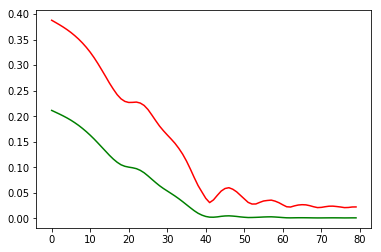

In [8]:
plt.plot(history.history['mean_absolute_error'], 'r'),
plt.plot(history.history['mean_squared_error'], 'g')

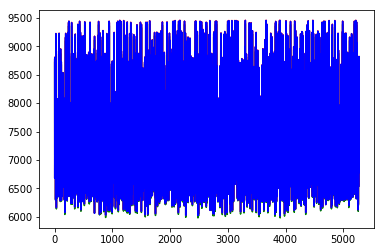

In [13]:
plt.plot(df['real'], color='g')
plt.plot(df['predicted'], 'r')
plt.plot(df['predicted_regul'], 'b')

In [14]:
df.describe()

,real,predicted,diff,predicted_regul,diff_regul
count,5275.000000,5275.000000,5275.000000,5275.000000,5275.000000
mean,7331.069909,7341.609177,-10.539268,7338.419177,-7.349268
std,713.694347,728.149284,20.318148,728.149284,20.318148
min,5982.000000,6020.040000,-101.720000,6016.850000,-98.530000
25%,6841.330000,6838.345000,-17.125000,6835.155000,-13.935000
50%,7225.000000,7224.280000,-3.190000,7221.090000,0.000000
75%,7619.405000,7629.530000,2.155000,7626.340000,5.345000
max,9399.000000,9456.420000,80.530000,9453.230000,83.720000
